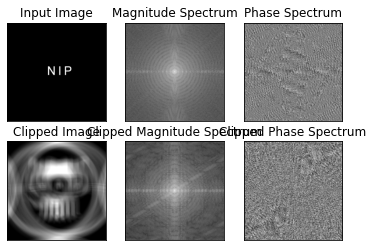

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [229]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, aperture_path):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    ap = cv2.resize(ap,size)
    
    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped).real # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_clipped) , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    


    
    return img_clipped

fourier_transform('aperture_3_image.bmp', 'aperture_image.png')



    
    


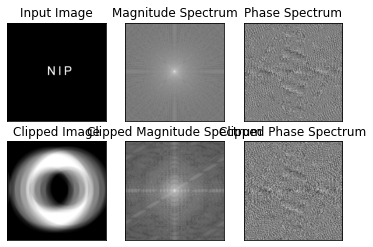

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [232]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, aperture_path):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    # ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    # ap = cv2.resize(ap,size)
    
    
    # Set image size and parameters
    size = (500, 500)
    outer_radius = 200
    inner_radius = 100
    sigma = 50

    # Generate synthetic circular disc image
    cx, cy = size[0]//2, size[1]//2
    x, y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
    d = np.sqrt((x - cx)**2 + (y - cy)**2)
    ap = np.zeros_like(d)
    ap[(d >= inner_radius) & (d <= outer_radius)] = 1


    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped).real # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_clipped) , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    


    
    return img_clipped

fourier_transform('aperture_3_image.bmp', 'aperture_image.png')



    
    


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image




def fourier_transform(image_path, aperture_path):
    
    size = (500,500)
    # Load image
    
    img = cv2.imread(image_path, 0)
    # ap = cv2.imread(aperture_path, 0)
    
    img = cv2.resize(img,size)
    # ap = cv2.resize(ap,size)
    
    
    # Set image size and parameters
    size = (500, 500)
    outer_radius = 200
    inner_radius = 100
    sigma = 50

 

    # Generate synthetic Gaussian image
    gaussian = np.exp(-(x-cx)**2/(2*sigma**2) - (y-cy)**2/(2*sigma**2))



    
    # Perform Fourier transform on input image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    # Perform Fourier transform on aprture image
    fa = np.fft.fft2(ap)
    fashift = np.fft.fftshift(fa)
    a_magnitude_spectrum = 20*np.log(np.abs(fashift))
    a_phase_spectrum = np.angle(fashift)

    
    
    
    # Convolve the two fourier transforms
    fshift_clipped = np.multiply(fshift,fashift) # convolution operation
    

    # Perform inverse Fourier transform on convolved Fourier transform
    
    
    img_clipped = np.fft.ifftshift(fshift_clipped).real # shifting back
    # img_clipped = cv2.normalize(img_clipped, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_clipped = cv2.normalize(np.abs(np.fft.ifftshift(np.fft.ifft2(fshift_clipped))), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        
  
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    phase_spectrum_clipped = np.angle(fshift_clipped)

    
    
    
    
    # Display images
    plt.subplot(231),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(232),plt.imshow(a_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
    plt.subplot(233),plt.imshow(phase_spectrum, cmap = 'gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(234),plt.imshow(np.abs(img_clipped) , cmap = 'gray')
    plt.title('Clipped Image'), plt.xticks([]), plt.yticks([])
        
    plt.subplot(235),plt.imshow(magnitude_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
   
    plt.subplot(236),plt.imshow(phase_spectrum_clipped, cmap = 'gray')
    plt.title('Clipped Phase Spectrum'), plt.xticks([]), plt.yticks([])
  
    plt.show()
    


    
    return img_clipped

fourier_transform('aperture_3_image.bmp', 'aperture_image.png')



    
    


In [2]:
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fourier_transform(image_path, inner_radius, outer_radius):
    dummy_outer_radius = 500 - outer_radius
    
    # Load image
    img = cv2.imread(image_path, 0)

    # Perform Fourier transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    
    
    

    # Apply mask to Fourier transform
    fshift_clipped = fshift * mask
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    magnitude_spectrum_clipped = np.where(mask != 1, 0, magnitude_spectrum_clipped) # Set clipped area to black
    phase_spectrum_clipped = np.angle(fshift_clipped)

    # Perform inverse Fourier transform on clipped Fourier transform
    f_ishift_clipped = np.fft.ifftshift(fshift_clipped)
    img_clipped = np.fft.ifft2(f_ishift_clipped).real

    
    # Save images
    # plt.imsave('input_image.jpg', img, cmap='gray')
    #plt.imsave(f'magnitude_spectrum_{inner_radius}_{outer_radius}.jpg', magnitude_spectrum, cmap='gray')
    #plt.imsave(f'phase_spectrum_{inner_radius}_{outer_radius}.jpg', phase_spectrum, cmap='gray')
    
    
#      # for a rendering
#     plt.imsave(f'outwards/clipped_img/a_clipped_image_{outer_radius}.jpg', img_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_magnitude/a_clipped_magnitude_spectrum_{outer_radius}.jpg', 
#                magnitude_spectrum_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_phase/a_clipped_phase_spectrum_{outer_radius}.jpg',
#                phase_spectrum_clipped, cmap='gray')
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_clipped.shape[1]), np.arange(magnitude_spectrum_clipped.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_magnitude/a_3d_clipped_magnitude_spectrum_{outer_radius}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_phase/a_3d_clipped_phase_spectrum_{outer_radius}.jpg', dpi = 200)


    
#     # for b rendering
    
#     plt.imsave(f'outwards/clipped_img/b_clipped_image_{inner_radius}.jpg', img_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_magnitude/b_clipped_magnitude_spectrum_{inner_radius}.jpg', 
#                magnitude_spectrum_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_phase/b_clipped_phase_spectrum_{inner_radius}.jpg',
#                phase_spectrum_clipped, cmap='gray')
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_clipped.shape[1]), np.arange(magnitude_spectrum_clipped.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_magnitude/b_3d_clipped_magnitude_spectrum_{inner_radius}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_phase/b_3d_clipped_phase_spectrum_{inner_radius}.jpg', dpi = 200)




#     # for c rendering
    
#     dummy_inner_radius = 350 - inner_radius
#     plt.imsave(f'outwards/clipped_img/c_clipped_image_{dummy_inner_radius}.jpg', img_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_magnitude/c_clipped_magnitude_spectrum_{dummy_inner_radius}.jpg', 
#                magnitude_spectrum_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_phase/c_clipped_phase_spectrum_{dummy_inner_radius}.jpg',
#                phase_spectrum_clipped, cmap='gray')
    
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_clipped.shape[1]), np.arange(magnitude_spectrum_clipped.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_magnitude/c_3d_clipped_magnitude_spectrum_{dummy_inner_radius}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_phase/c_3d_clipped_phase_spectrum_{dummy_inner_radius}.jpg', dpi = 200)
    
    
#     # for d rendering
    
#     dummy_outer_radius = 350 - outer_radius
#     plt.imsave(f'outwards/clipped_img/d_clipped_image_{dummy_outer_radius}.jpg', img_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_magnitude/d_clipped_magnitude_spectrum_{dummy_outer_radius}.jpg', 
#                magnitude_spectrum_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_phase/d_clipped_phase_spectrum_{dummy_outer_radius}.jpg',
#                phase_spectrum_clipped, cmap='gray')


#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_clipped.shape[1]), np.arange(magnitude_spectrum_clipped.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_magnitude/d_3d_clipped_magnitude_spectrum_{dummy_outer_radius}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_phase/d_3d_clipped_phase_spectrum_{dummy_outer_radius}.jpg', dpi = 200)

    
#     # for e rendering
    
#     plt.imsave(f'outwards/clipped_img/e_clipped_image_{outer_radius}.jpg', img_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_magnitude/e_clipped_magnitude_spectrum_{outer_radius}.jpg', 
#                magnitude_spectrum_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_phase/e_clipped_phase_spectrum_{outer_radius}.jpg',
#                phase_spectrum_clipped, cmap='gray')
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_clipped.shape[1]), np.arange(magnitude_spectrum_clipped.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_magnitude/e_3d_clipped_magnitude_spectrum_{outer_radius}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_phase/e_3d_clipped_phase_spectrum_{outer_radius}.jpg', dpi = 200)
    
    
    
#     # for f rendering
    
#     plt.imsave(f'outwards/clipped_img/f_clipped_image_{dummy_outer_radius}.jpg', img_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_magnitude/f_clipped_magnitude_spectrum_{dummy_outer_radius}.jpg', 
#                magnitude_spectrum_clipped, cmap='gray')
#     plt.imsave(f'outwards/clipped_phase/f_clipped_phase_spectrum_{dummy_outer_radius}.jpg',
#                phase_spectrum_clipped, cmap='gray')    
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     X, Y = np.meshgrid(np.arange(magnitude_spectrum_clipped.shape[1]), np.arange(magnitude_spectrum_clipped.shape[0]))
#     ax.plot_surface(X, Y, magnitude_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_magnitude/f_3d_clipped_magnitude_spectrum_{dummy_outer_radius}.jpg', dpi = 200)
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, phase_spectrum_clipped, cmap='magma')
#     fig.savefig(f'outwards/clipped_3d_phase/f_3d_clipped_phase_spectrum_{dummy_outer_radius}.jpg', dpi = 200)


    return img_clipped


# fourier_transform('image.jpg', 100, 350)


# # a generation (outer-outwards)

# for i in range (0,350,5):
#     fourier_transform('image.jpg',0,i)
    
    
# # b generation (inner-outwards)

# for i in range (0,350,5):
#     fourier_transform('image.jpg',i,350)
    

# # c generation (inner-inwards)

# for i in range (0,350,5):
#     fourier_transform('image.jpg',350-i,350)
    

# # d generation (outer-inwards)

# for i in range (0,350,5):
#     fourier_transform('image.jpg',0 ,350-i)
    

# # e generation (shell-outwards)

# for i in range (0,350,5):
#     fourier_transform('image.jpg',0+i ,30 + i)
    
    
# # f generation (shell-inwards)

# for i in range (0,350,5):
#     fourier_transform('image.jpg', 350 - i ,380 - i)